In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
data = pd.read_csv("movies.csv")

In [3]:
data.head(5)

,Title,US Gross,Worldwide Gross,US DVD Sales,Production Budget,Release Date,MPAA Rating,Running Time (min),Distributor,Source,Major Genre,Creative Type,Director,Rotten Tomatoes Rating,IMDB Rating,IMDB Votes
0,The Land Girls,146083,146083,NaN,8000000.0,12-Jun-98,R,NaN,Gramercy,NaN,NaN,NaN,NaN,NaN,6.1,1071.0
1,"First Love, Last Rites",10876,10876,NaN,300000.0,7-Aug-98,R,NaN,Strand,NaN,Drama,NaN,NaN,NaN,6.9,207.0
2,I Married a Strange Person,203134,203134,NaN,250000.0,28-Aug-98,NaN,NaN,Lionsgate,NaN,Comedy,NaN,NaN,NaN,6.8,865.0
3,Let's Talk About Sex,373615,373615,NaN,300000.0,11-Sep-98,NaN,NaN,Fine Line,NaN,Comedy,NaN,NaN,13.0,NaN,NaN
4,Slam,1009819,1087521,NaN,1000000.0,9-Oct-98,R,NaN,Trimark,Original Screenplay,Drama,Contemporary Fiction,NaN,62.0,3.4,165.0


In [4]:
# Now we need to analysis which columns has some kind of realtion. 
# For example: IMDB rating vs Production budget 
columns_names = data.columns
Rate_budget = data.iloc[:,[4,14]].dropna()    # remove empty values. 
Rate_budget.corr()                            # calculate correlation coefficient

,Production Budget,IMDB Rating
Production Budget,1.000000,0.015312
IMDB Rating,0.015312,1.000000


The Pearson correlation is one of the best way to find whether two parmeters have relationship. 
As we can see the chart above, the value of Pearson correlation is very small, which means less relationship between Production Budget and IMDB Rating. In the data, there is no any information about revenue, but in personal perspective, there is no relationship between movie budget and revenue. 

Step 2 Data cleaning is an very important way to pre-process data. As we can see from the data head, there are lots of missing data, which hinder data visualization presenting in the next step. 
Before we draw the chart, we want to verify a guess that the more people buy movies, the more the score of them is higher.  

In [5]:
# Pick up US DVD Sales and Rotten Tomatoes Rating, IMDB Rating, IMDB Votes
data_rate_vs_gross = data.iloc[:,[3,13,14,15]].dropna()
print(data_rate_vs_gross.values.shape)
data_rate_vs_gross.corr()

(458, 4)


,US DVD Sales,Rotten Tomatoes Rating,IMDB Rating,IMDB Votes
US DVD Sales,1.000000,0.231493,0.227117,0.523240
Rotten Tomatoes Rating,0.231493,1.000000,0.741524,0.471395
IMDB Rating,0.227117,0.741524,1.000000,0.530218
IMDB Votes,0.523240,0.471395,0.530218,1.000000


In [6]:
# check if gross number have realtionship with score rate
# Note: the gross number is string, need to transform as interger. 
data_gross_us_vs_IMDB_Rating = data.iloc[:,[1,2,14]].dropna().values

gross_us = data_gross_us_vs_IMDB_Rating[:, 0]
gross_W = data_gross_us_vs_IMDB_Rating[:, 1]
IMDB_Rating = data_gross_us_vs_IMDB_Rating[:,2]

gross_us = list(gross_us)
gross_W = list(gross_W)


def StrToInt(List):
    List = pd.Series(List).str.replace('Unknown', '0')
    new_list = []
    for i in range(len(List)):
        new_list.append(int(List[i]))
    
    return new_list 


IMDB_Rating = np.array(IMDB_Rating).reshape(-1,1)
newGrossUS_array = np.array(StrToInt(gross_us)).reshape(-1,1)
newGrossW_array = np.array(StrToInt(gross_W)).reshape(-1,1)

final_array = np.hstack((newGrossUS_array,newGrossW_array,IMDB_Rating)).astype(float)   

final_data = pd.DataFrame(final_array, 
                          columns=['US Gross', 'Worldwide Gross', 'IMDB Rating'])

final_data.corr()         # Or use:   corr = np.corrcoef(final_array,rowvar=False)

,US Gross,Worldwide Gross,IMDB Rating
US Gross,1.000000,0.938718,0.196332
Worldwide Gross,0.938718,1.000000,0.196936
IMDB Rating,0.196332,0.196936,1.000000


In [7]:
# Now we need to clean all data and combine the new one. 
# step 1: remove all nan values. 

No_Nan_data = data.dropna().values

# step 2: seprate data into few parts, first cols, 2&3 cols and the rest. 
# and then combine them 

title = No_Nan_data[:,0].reshape(-1,1)
US_gross = list(No_Nan_data[:,1])
W_gross = list(No_Nan_data[:,2])
US_gross = np.array(StrToInt(US_gross)).reshape(-1,1)
W_gross = np.array(StrToInt(W_gross)).reshape(-1,1)
the_rest = No_Nan_data[: ,3:16]
array_two_gross = np.hstack((US_gross, W_gross)).astype(float)

final_data_arrayshape = np.hstack((title, array_two_gross, the_rest))
clean_data = pd.DataFrame(final_data_arrayshape, columns = data.columns)  
clean_data.head(5)

,Title,US Gross,Worldwide Gross,US DVD Sales,Production Budget,Release Date,MPAA Rating,Running Time (min),Distributor,Source,Major Genre,Creative Type,Director,Rotten Tomatoes Rating,IMDB Rating,IMDB Votes
0,12 Rounds,1.22347e+07,1.81841e+07,8.28386e+06,2e+07,27-Mar-09,PG-13,108,20th Century Fox,Original Screenplay,Action,Contemporary Fiction,Renny Harlin,28,5.4,8914
1,2012,1.66112e+08,7.66812e+08,5.0736e+07,2e+08,13-Nov-09,PG-13,158,Sony Pictures,Original Screenplay,Action,Science Fiction,Roland Emmerich,39,6.2,396
2,300,2.10615e+08,4.56068e+08,2.61252e+08,6e+07,9-Mar-07,R,117,Warner Bros.,Based on Comic/Graphic Novel,Action,Historical Fiction,Zack Snyder,60,7.8,235508
3,3:10 to Yuma,5.36069e+07,6.97919e+07,5.13594e+07,4.8e+07,2-Sep-07,R,117,Lionsgate,Remake,Western,Historical Fiction,James Mangold,89,7.9,98355
4,88 Minutes,1.69309e+07,3.29554e+07,1.13851e+07,3e+07,18-Apr-08,R,106,Sony Pictures,Original Screenplay,Thriller/Suspense,Contemporary Fiction,Jon Avnet,5,5.9,31205


In [8]:
# we want to check the average score in different companies. 

data = clean_data.iloc[:,[8,14]]
group = data.groupby('Distributor').apply(np.mean, axis=0)
group_unstack = group.unstack().tolist()

In [9]:
# and more precise, we want to know which company get the socre greater than 7. 
group_sort = group.sort_values(by='IMDB Rating', ascending=False)
group_greater_seven = group_sort[group_sort['IMDB Rating']>=7]
group_greater_seven

,IMDB Rating
Distributor,
Dreamworks SKG,7.900000
Focus Features,7.750000
Miramax,7.600000
Paramount Vantage,7.566667
Fox Searchlight,7.500000
Weinstein Co.,7.340000
Warner Bros.,7.178261
Walt Disney Pictures,7.153846
Newmarket Films,7.100000


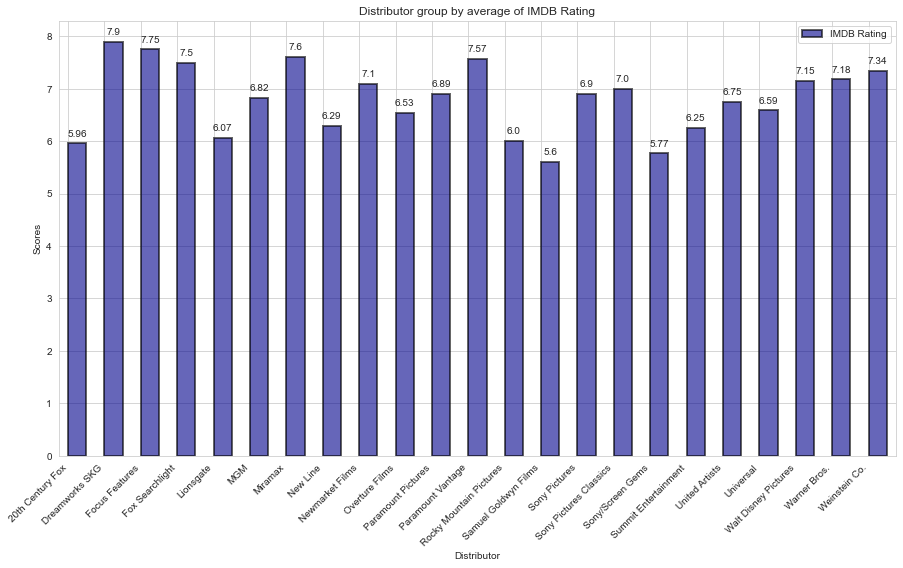

In [10]:
# Then we show the chart(all companies.)

from matplotlib import rcParams
labels = [round(group_unstack[i],2) for i in range(len(group_unstack))]
rcParams['figure.figsize'] = 15,8   # set figure size
sns.set_style("whitegrid")

bar_chart = group.plot.bar(color=('darkblue'),alpha = 0.6, align='edge', edgecolor = 'k', linewidth = 2)
bar_chart.set_xticklabels(bar_chart.get_xticklabels(), rotation=45, horizontalalignment='right')
bar_chart.set_title('Distributor group by average of IMDB Rating')
bar_chart.set_ylabel('Scores')
#################################################################################################
# parameter instruction: 
# barchart = sns.barplot() like format
# labels: is a list putting labels 
# distance: the distance above the bar. 

def autolabel(barchart, labels, distance = 0):
    rects = barchart.patches
    labels = [round(labels[i],2) for i in range(len(labels))]
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        bar_chart.text(rect.get_x() + rect.get_width() / 2, height + distance, label,
                ha='center', va='bottom')
##################################################################################################
autolabel(bar_chart, labels, 0.1)

Text(0.5, 1.0, 'The distribution of MPAA Rating')

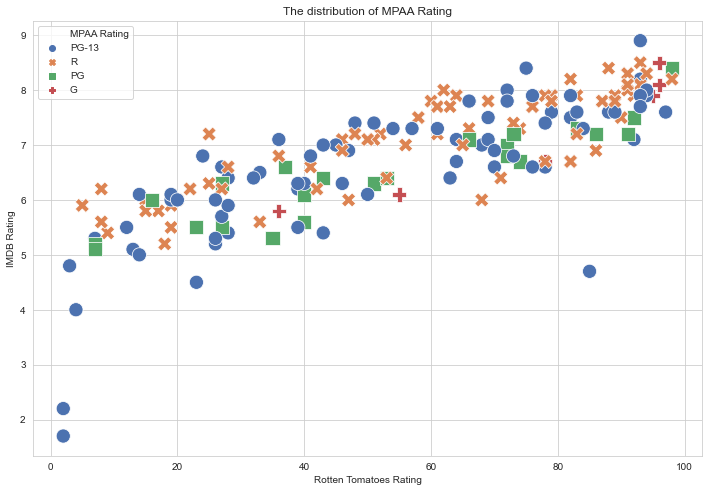

In [48]:
# Method 2
# Now we want to find out the distribution of MPAA Rating. 
# We need another parameters as reference, Rotten Tomatoes Rating & IMDB Rating
sns.set_style("whitegrid")
rcParams['figure.figsize'] = 12,8
dataS = clean_data.iloc[:, [6,13,14]]
ax = sns.scatterplot(data=dataS, x='Rotten Tomatoes Rating',y='IMDB Rating',hue='MPAA Rating'
               ,style='MPAA Rating', palette="deep", s=200)
ax.set_title('The distribution of MPAA Rating')

In [54]:
# Finall, find the average of different MPAA Rating score
group_Sdata = dataS.groupby('MPAA Rating').apply(np.mean, axis=0)
group_Sdata

,Rotten Tomatoes Rating,IMDB Rating
MPAA Rating,,
G,76.000000,7.183333
PG,52.739130,6.465217
PG-13,52.526316,6.588158
R,58.478261,7.082609


compare 2 charts and get the final CONCLUSION. 